Final Code

***Please use for grading purposes.

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


In [128]:
df = pd.read_csv('../unsupervised_learning_challenge/crypto_data.csv', index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [129]:
df = df.loc[df['IsTrading'] == True]
df = df.dropna(axis=0,how='any')
df = df.loc[df['TotalCoinsMined'] > 0]
df = df.drop('IsTrading', axis=1)
df = df.drop('CoinName', axis=1)

x = pd.get_dummies(data=df, columns=['Algorithm','ProofType'])
x

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
x_scaled = StandardScaler().fit_transform(x)
x_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [131]:
components = PCA(n_components=.9).fit_transform(x_scaled)
components

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         9.59739281e-16,  1.97575530e-15, -3.71605237e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         5.43061254e-16,  1.99779328e-15, -3.11626968e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         3.54476800e-16, -4.32593747e-14,  1.65758952e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -6.75451531e-15, -2.68400098e-14, -3.09519451e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -2.98168844e-15,  1.40929630e-15,  2.00083429e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -2.01376397e-16, -1.84880272e-16,  9.16676431e-16]])

In [132]:
features = TSNE(perplexity=50).fit_transform(components)
features.shape

(532, 2)

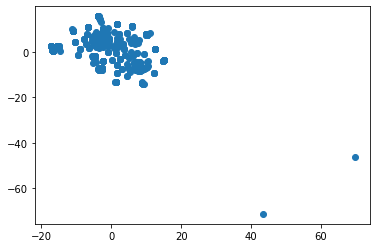

In [133]:
plt.scatter(features[:,0], features[:,1])
plt.show()

In [134]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(components)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

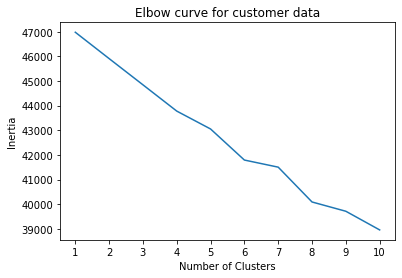

In [135]:
plt.plot(df_elbow['k'],df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

First Run Through

***Please ignore code below for grading. This was my code prior to cleaning it up above this cell.

In [136]:
df = pd.read_csv('../unsupervised_learning_challenge/crypto_data.csv', index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [137]:
is_trading = df.loc[df['IsTrading'] == True]
is_trading['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [138]:
df = is_trading.drop('IsTrading', axis=1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [139]:
df = df.dropna(how = 'any')
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         685 non-null    object 
 1   Algorithm        685 non-null    object 
 2   ProofType        685 non-null    object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.1+ KB


In [140]:
mined = df.loc[df['TotalCoinsMined'] > 0]
mined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.9+ KB


In [141]:
df = mined.drop('CoinName', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
df = pd.get_dummies(data=df, columns=['Algorithm','ProofType'])
df.shape

In [ ]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled.shape

In [ ]:
pca = PCA(n_components=.9)
components = pca.fit_transform(df_scaled)
components.shape


In [ ]:
x_embedded = TSNE().fit_transform(components)
x_embedded.shape


In [ ]:
plt.scatter(x_embedded[:,0], x_embedded[:,1])
plt.show()

In [ ]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x_embedded)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()
df_elbow.plot(x='k',y='inertia')